In [4]:
#                                    K en yakın komşu

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


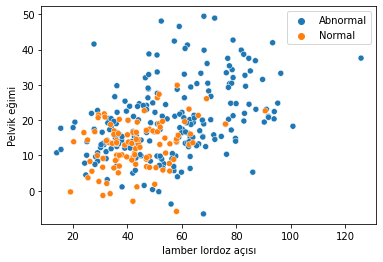

In [6]:
sns.scatterplot(data=data,x = "lumbar_lordosis_angle", y = "pelvic_tilt numeric",hue="class")
plt.xlabel("lamber lordoz açısı")
plt.ylabel("Pelvik eğimi")
plt.legend()
plt.show()

In [8]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [9]:
y = data["class"].values
x_data = data.drop(["class"],axis=1)

In [11]:
x =(x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=1)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
komsu_sayisi = 4
knn = KNeighborsClassifier(n_neighbors=komsu_sayisi)
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)
print("{} En Yakın Komşu Modeli Test Doğruluğu {} ".format(komsu_sayisi,knn.score(x_test,y_test)))

4 En Yakın Komşu Modeli Test Doğruluğu 0.6382978723404256 


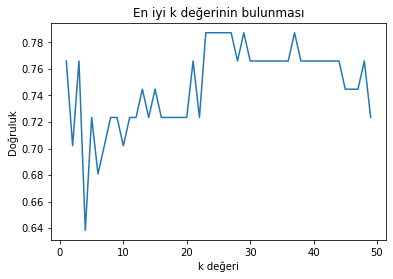

In [14]:
#                                 En iyi K Değerinin Bulunması

score_list = []
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,50),score_list)
plt.xlabel("k değeri")
plt.ylabel("Doğruluk")
plt.title("En iyi k değerinin bulunması")
plt.show()

In [23]:
#                                    Destek Vektör  Makinesi

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [24]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [25]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [26]:
y = data["class"].values
x_data = data.drop(["class"], axis =1)

In [27]:
x =(x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=1)

In [33]:
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

print("Destek Vektör Makinesi Modeli Test Doğruluğu: {}".format(svm.score(x_test,y_test)))

Destek Vektör Makinesi Modeli Test Doğruluğu: 0.7872340425531915


In [34]:
#                                    Karar Ağacı

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [35]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [36]:
y = data["class"].values
x_data = data.drop(["class"], axis =1)

In [37]:
x =(x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=1)

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Karar Ağacı Modeli Test Doğruluğu: {}".format(dt.score(x_test,y_test)))

Karar Ağacı Modeli Test Doğruluğu: 0.851063829787234


In [40]:
#                                       Rastgele Orman

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [41]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [42]:
y = data["class"].values
x_data = data.drop(["class"], axis =1)

In [43]:
x =(x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=1)

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)

print("Rastgele Orman Modeli Test Doğruluğu: {}".format(rf.score(x_test,y_test)))

Rastgele Orman Modeli Test Doğruluğu: 0.8723404255319149


In [46]:
#                                            Konfucion Matris

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [47]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [48]:
y = data["class"].values
x_data = data.drop(["class"], axis =1)

In [49]:
x =(x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=1)

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)

print("Rastgele Orman Modeli Test Doğruluğu: {}".format(rf.score(x_test,y_test)))

Rastgele Orman Modeli Test Doğruluğu: 0.8723404255319149


In [52]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[14,  3],
       [ 3, 27]], dtype=int64)

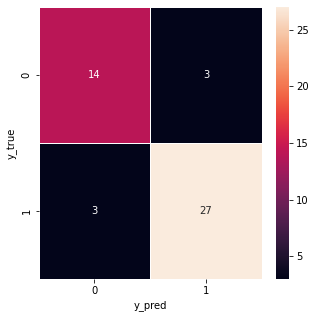

In [53]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="white",fmt=".0f")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [13]:
#                                       Kümeleme

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [17]:
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3),axis= 0)
y = np.concatenate((y1,y2,y3),axis= 0)

dictionary = {"x":x,"y":y}

data = pd.DataFrame(dictionary)
data.head()

,x,y
0,15.991952,30.811553
1,23.281279,26.347078
2,31.574957,18.529027
3,25.202448,15.517991
4,19.096001,22.276397


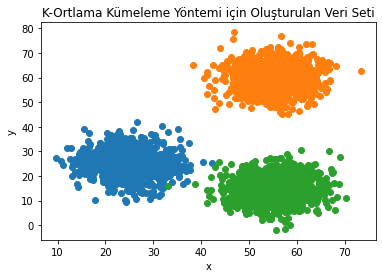

In [18]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortlama Kümeleme Yöntemi için Oluşturulan Veri Seti")
plt.show()

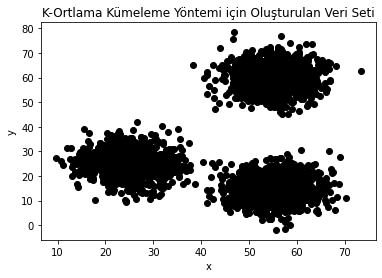

In [19]:
plt.figure()
plt.scatter(x1,y1,color="black")
plt.scatter(x2,y2,color="black")
plt.scatter(x3,y3,color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortlama Kümeleme Yöntemi için Oluşturulan Veri Seti")
plt.show()

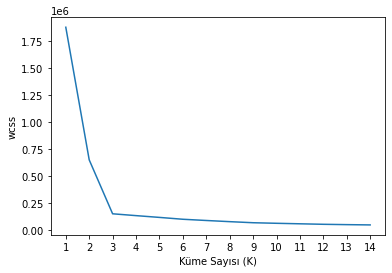

In [22]:
#                               K Değerinin Seçimi

from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.figure()
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel("Küme Sayısı (K)")
plt.ylabel("wcss")
plt.show()

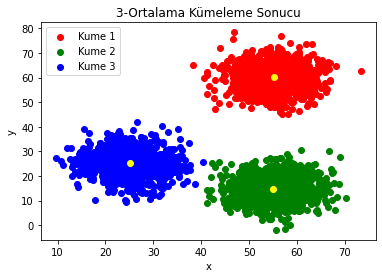

In [25]:
k_ortalama = KMeans(n_clusters=3)
kumeler = k_ortalama.fit_predict(data)

data["label"] = kumeler

plt.figure()
plt.scatter(data.x[data.label == 0],data.y[data.label == 0],color="red",label="Kume 1")
plt.scatter(data.x[data.label == 1],data.y[data.label == 1],color="green",label="Kume 2")
plt.scatter(data.x[data.label == 2],data.y[data.label == 2],color="blue",label="Kume 3")
plt.scatter(k_ortalama.cluster_centers_[:,0],k_ortalama.cluster_centers_[:,1],color="yellow")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Ortalama Kümeleme Sonucu")
plt.show()

In [26]:
#                                       Hiyerarşik Kümeleme

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [27]:
x1 = np.random.normal(25,5,20)
y1 = np.random.normal(25,5,20)

x2 = np.random.normal(55,5,20)
y2 = np.random.normal(60,5,20)

x3 = np.random.normal(55,5,20)
y3 = np.random.normal(15,5,20)

x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)

dictionary = {"x":x,"y":y}

data = pd.DataFrame(dictionary)
data.head()

,x,y
0,23.660234,23.741562
1,27.323963,24.893165
2,24.786052,24.325722
3,22.630041,26.786865
4,28.014187,29.110269


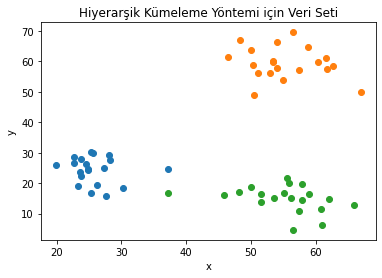

In [28]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hiyerarşik Kümeleme Yöntemi için Veri Seti")
plt.show()

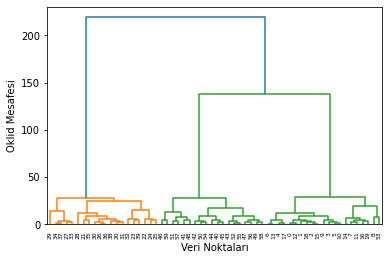

In [29]:
#                                Dendiogram Gösterimi

from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data,method="ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("Veri Noktaları")
plt.ylabel("Oklid Mesafesi")
plt.show()

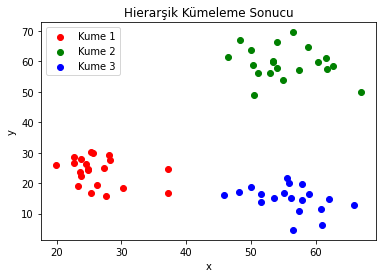

In [30]:
# hiyerarşik kümelemede kümeler oluşturulur ve en yakın 2 küme birleştirilerek devam edilir.

from sklearn.cluster import AgglomerativeClustering

hiyerarsi_kume = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
kume = hiyerarsi_kume.fit_predict(data)

data["label"] = kume

plt.figure()
plt.scatter(data.x[data.label == 0],data.y[data.label == 0],color="red",label="Kume 1")
plt.scatter(data.x[data.label == 1],data.y[data.label == 1],color="green",label="Kume 2")
plt.scatter(data.x[data.label == 2],data.y[data.label == 2],color="blue",label="Kume 3")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hierarşik Kümeleme Sonucu")
plt.show()

In [1]:
#                                      Temen Bileşen Analizi

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

data = iris.data
feature_names = iris.feature_names
y= iris.target

df = pd.DataFrame(data,columns=feature_names)
df["sinif"] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten=True) # whilten = normalizasyon
pca.fit(data)

x_pca = pca.transform(data)

print("varience ratio: ",pca.explained_variance_ratio_)

print("sum: ", sum(pca.explained_variance_ratio_))

varience ratio:  [0.92461872 0.05306648]
sum:  0.9776852063187949


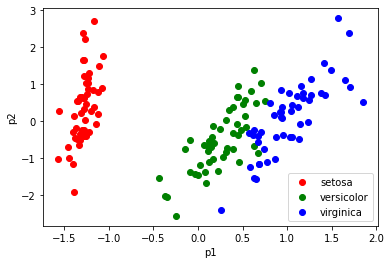

In [6]:
df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]

color = ["red","green","blue"]

for each in range(3):
    plt.scatter(df.p1[df.sinif == each],df.p2[df.sinif == each], color=color[each],label=iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

In [9]:
#                                      PCA ve Kernel PCA

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

x, y = make_circles(n_samples=1_000,factor=0.3,noise=0.05,random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=0)

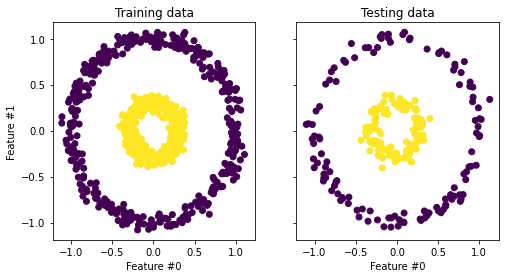

In [11]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [14]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(n_components=None,kernel="rbf",gamma=10,fit_inverse_transform=True,alpha=0.1)

x_test_pca = pca.fit(x_train).transform(x_test)
x_test_kernel_pca = kernel_pca.fit(x_train).transform(x_test)

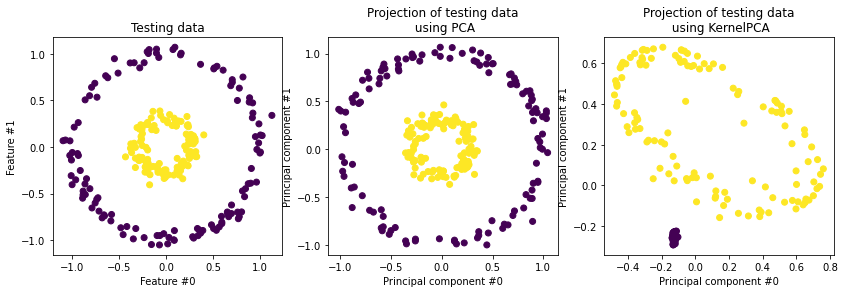

In [16]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(x_test_kernel_pca[:, 0], x_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

In [17]:
# varyans temelli öz nitelik seçimi
from sklearn.feature_selection import VarianceThreshold
x=[[0,0,1],[0,1,0],[1,0,0],[0,1,1],[0,1,0],[0,1,1]]
x

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

In [18]:
sel = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
sel.fit_transform(x)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [19]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [20]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

In [21]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [22]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 3)

In [23]:
lsvc = LinearSVC(C=0.01, penalty="l2", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 2)

In [26]:
#                       Ağaç Temelli Nitelik Seçimi

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
x, y = load_iris(return_X_y=True)
x.shape

(150, 4)

In [27]:
clf = ExtraTreesClassifier(n_estimators=50)
# 50 farklı ağaç oluşturucak
clf = clf.fit(x,y)
clf.feature_importances_
# bütün çıkan sonuçlar üzerinden (50 sonuç) bir ortalama hesaplar
# aşağıda değişkenlerin ortalama etkileri yazıyor

array([0.08083529, 0.05863665, 0.41703226, 0.44349581])

In [28]:
#                               Model Seçimi

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

from sklearn.datasets import load_iris

In [29]:
iris = load_iris()

x = iris.data
y= iris.target

In [30]:
x =(x - np.min(x)) / (np.max(x) - np.min(x))

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [35]:
#                           Çapraz Doğrulama ile Model Eğitimi
# veriyi parçalara bölerek öğrenir

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [36]:
# 3 En Yakın Komşu
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [37]:
# 10 fold çapraz doğrulama yapalım
from sklearn.model_selection import cross_val_score
fold_sayisi =10
dogruluklar = cross_val_score(estimator=knn,X = x_train,y = y_train,cv = fold_sayisi)
print("Ortalama doğruluk : ",np.mean(dogruluklar))
print("Doğrulukların standart sapması :",np.std(dogruluklar))

Ortalama doğruluk :  0.9518181818181818
Doğrulukların standart sapması : 0.06581341017359368


In [38]:
#                                    Izgara araması çapraz doğrulama
# mesela k en yakın komşuda en iyi k değeri için kullanılır

In [39]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

from sklearn.datasets import load_iris

In [40]:
iris = load_iris()

x = iris.data
y= iris.target

In [41]:
x =(x - np.min(x)) / (np.max(x) - np.min(x))

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [44]:
from sklearn.model_selection import GridSearchCV

grid = {"n_neighbors":np.arange(1,50)}
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn,grid,cv=10)
knn_cv.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [45]:
print("En iyi K Değeri: ",knn_cv.best_params_)
print("En iyi K Değerine Göre Doğruluk Değeri",knn_cv.best_score_)

En iyi K Değeri:  {'n_neighbors': 13}
En iyi K Değerine Göre Doğruluk Değeri 0.9800000000000001


In [46]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

grid = {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x,y)


print("En iyi Hiper Parametre",logreg_cv.best_params_)
print("En iyi Hiper Parametreye Göre Doğruluk",logreg_cv.best_score_)

En iyi Hiper Parametre {'C': 1000.0, 'penalty': 'l2'}
En iyi Hiper Parametreye Göre Doğruluk 0.9800000000000001


In [51]:
#                                        Deep Learning
# Eğitim.csvdosyası olmadığı için hata veriyor

In [52]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
veri = pd.read_csv("egitim.csv")
print("Verinin Boyutu: ",veri.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'egitim.csv'

In [ ]:
label_filte0 = 0
label_filte1 = 1

veri.pd.concat([veri[veri["label"] == label_filte0],
               veri[veri["label"] == label_filte1]], axis = 0)
veri.head()

In [ ]:
Y_veri = veri["label"]

X_veri = veri.drop(["label"],axis=1)
print("X veri : ", X_veri.shape)
print("Y veri : ", V_veri.shape)

In [ ]:
resim_boyutu = int(np.sqrt(X_veri.shape[1]))

In [ ]:
# verideki 900. değeri görselleştiriyoruz
resim1 = X_veri.iloc[900].values
resim1 = resim1.reshape(resim_boyutu,resim_boyutu)
plt.imgshow(resim1,cmap="gray")
plt.axis('off')
plt.show()

In [ ]:
X_egitim, X_test, Y_egitim, Y_test = train_test_split(X_veri,Y_veri,test_size=0.15,random_state=42)

print("X egitim: ",X_egitim.shape)
print("X test: ",X_test.shape)

In [ ]:
x_egitim = X_egitim.T
x_test = X_test.T
y_egitim = Y_egitim.values.reshape(-1,1).T
y_test = Y_test.values.reshape(-1,1).T
print("x egitim: ",x_egitim.shape)
print("x test: ",x_test.shape)
print("y egitim: ",y_egitim.shape)
print("y egitim: ",y_test.shape)

In [ ]:
#                                       Katmanlı Sinir Ağları

In [60]:
# ilklendirme
def layerSayisiniParametriIlklendir(x_train,y_train):
    parameters = {"weight":np.random.rand(3,x_train.shape[0]) * 0.1,
                 "bias1":np.zeros(3,1),
                 "weight2":np.random.randn(y_train.shape[0],3) * 0.1},
                 "bias2":np.zeros((y_train.shape[0],1))}
    return parameters

In [57]:
def sigmoid(z):
    
    y_head = 1/(1+np.exp(-z))
    return y_head
sigmoid(0)

0.5

In [ ]:
def ileriYayilmaNN(x_train,parameters):
    
    Z1 = np.dot(parameters["weight1"],x_train +parameters["bias1"])
    A1 = np.tanh(Z1)
    Z2 = Z1 = np.dot(parameters["weight2"],A1 +parameters["bias2"])
    A2 = sigmoid(Z2)
    
    cache = {"Z1":Z1,
            "A1":A1,
            "Z2":Z2,
            "A2":A2}
    return A2, cache

In [ ]:
# maliyet hesabı
def maliyetHesaplaNN(A2,Y,parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [ ]:
# Geriye yayılma
def geriyeYayilmaNN(parameters, cache, X, Y):

    dZ2 =cache["A2"]-Y

    dW2 = np.dot(dZ2, cache["A1"].T)/X.shape[1]

    db2 = np.sum(dZ2, axis = 1,keepdims=True)/X.shape[1]

    dZ1 = np. dot (parameters ["weight2" ]. T, dz2)*(1 - np.power (cache["A1"], 2))

    dw1 = np.dot (dZ1, X. T)/X. shape[1]

    db1 = np.sum (dz1,axis = 1,keepdims=True)/X.shape[1]

    grads = {"dweight1": dw1,"dbias1": db1,"dweight2": dw2,"dbias2": db2}

    return grads

In [ ]:
def parametreGuncelleNN(parameters, grads, learning_rate= 0.01):

    parameters = {"weight": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1":parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2":parameters["weight2"]-learning_rate*grads["weight2"],
                  "bias2":parameters["bias2"]-learning_rate*grads["bias2"]}
    return parameters

In [ ]:
def tahminNN(parameters, x_test):

# x test ileri yayilma girdisidir.

    A2, cache = ileriYayilmaNN(x_test, parameters)

    Y_prediction = np.zeros((1,x_test.shape[1]))

    # eğer z 0.5'den büyükse, 1 sınıfına ait resimler

    # eğer z 0.5'den küçükse, e sfina ait resimler

    for i in range(A2. shape[1]):

        if A2[0,i]<= 0.5: 
            Y_prediction[0,i] = 0

        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [ ]:
# 2 katmanlı sinir ağı oluşturma

def ikikatmanNN(x_train, y_train,x_test,y_test, num_iterations): 
    cost_list = []
    index_list = []
    # ilklendirme
    parameters = layerSayisiniParametreleriIlklendir(x_train, y_train)
    
    for i in range(0, num_iterations):
        # ileri yayılım
        A2, cache = ileriYayilmaNN(x_train, parameters)
        # maliyet hesapla
        cost = maliyetHesaplaNN(A2, y_train, parameters)
        # geriye yayılım
        grads = geriyeYayilmaNN(parameters, cache, x_train, y_train)
        # parametreleri güncelle
        parameters = parametreGuncelleNN (parameters, grads)
    
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
    print ("İterasyon: %i, Maliyet: %f" % (i, cost))
    plt.plot (index_list, cost_list) 
    plt.xticks (index_list, rotation='vertical')
    plt.xlabel("Iterasyon Sayisi")
    plt.ylabel("Maliyet")
    plt.show()
    
    #predict
    y_prediction_test = tahminNN(parameters,x_test)
    y_prediction_train = tahminNN(parameters,x_train)
    
    # eğitim ve test doğruluğu 
    print("Eğitim Doğruluğu: {} %".format(
    100-np.mean(np.abs(y_prediction_train-y_train) * 100)))
    print("Test Doğruluğu {} %".format(
    100 - np.mean(np.abs(y_prediction_test-y_test))))
    

parameters = ikikatmanNN(x_egitim,y_egitim,x_test,y_test,num_iterations=900)

In [ ]:
# n katmanlı sinir ağı oluşturma

x_egitim, x_test, y_egitim, y_test = 
                    x_egitim.T, x_test.T, y_egitim.T, y_test.T

In [ ]:
# yapay sinir ağları kütüphaneleri

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network Library from keras.layers import Dense # build our Layers Library

# modelimiz için bir metot yazalım 
def siniflandiriciMethot():
    classifier = Sequential() # initialize neural network =
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = "relu", input_dim = x_egitim.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = "relu"))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = "sigmoid"))
    classifier.compile(optimizer = "adam", loss = 'binary crossentropy', metrics = ["accuracy"])
    return classifier

siniflandirici = KerasClassifier(build_fn = siniflandiriciMethot, epochs = 5) 
dogruluk = cross_val_score(estimator = siniflandirici, X = x_egitim, y = y_egitim, cv =3 )

ortalama = dogruluk.mean()

varyans = dogruluk.std()

print("Doğruluğun ortalaması: "+ str(ortalama))
print("Doğruluğun Varyansı: "+ str(varyans))